Install & import packages

In [2]:
!pip install --quiet tqdm

In [3]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: numpy>=1.9.0 in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.6/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skewtest, boxcox
from sklearn.base import TransformerMixin, BaseEstimator
from tqdm import tqdm

# Load the data

In [5]:
# raw data
train_raw = pd.read_csv('./train.csv')

In [6]:
train_raw.shape

(595212, 59)

In [7]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [8]:
train = pd.read_pickle('./train.pkl')
# test = pd.read_pickle('./test.pkl')

In [9]:
train.shape

(595212, 246)

In [10]:
print('Train dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
# print('Test dataset has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Train dataset has 595212 rows and 246 columns


Create a combined dataset to deskew, then split out again

In [11]:
target = train['target']
train.drop('target', axis=1, inplace=True)
train.drop('id', axis=1, inplace=True)

In [12]:
print('Train dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
# print('Test dataset has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Train dataset has 595212 rows and 244 columns


In [15]:
numeric_cols = []
for col in train.columns:
    if '_bin' in col:
        pass
    elif '_cat' in col:
        pass
    else:
        numeric_cols.append(col)
    
        

In [16]:
len(numeric_cols)

26

# Scale and PCA

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(train)
pca = PCA()
pca_comp = pca.fit_transform(train_sc)

In [62]:
pca_comp.shape

(595212, 244)

In [63]:
train.shape

(595212, 244)

In [64]:
n_comp_to_keep = 136
print("The first {} components explains {} of the data: "
      .format(n_comp_to_keep , sum(pca.explained_variance_ratio_[:n_comp_to_keep])))

The first 136 components explains 0.8008919152129205 of the data: 


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     pca_comp[:,:n_comp_to_keep], target, test_size=0.33, random_state=42)


# UMAP projection

In [46]:
!pip install --upgrade llvmlite

Requirement already up-to-date: llvmlite in /opt/conda/lib/python3.6/site-packages


In [47]:
!pip install umap-learn

In [49]:
import umap
import time

In [71]:
uboat = umap.UMAP()
start = time.clock()
embedding = uboat.fit_transform(X_train)
end = time.clock()

In [76]:
print('Time taken: {}'.format(end-start))

Time taken: 39995.349685


In [85]:
embedding.shape

(398792, 2)

### plot projection

In [79]:
import matplotlib.pyplot as plt

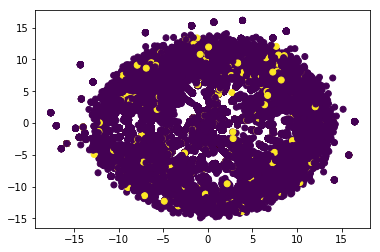

In [86]:
plt.scatter(embedding[:,0], embedding[:,1],c=y_train)

In [ ]:
plt.scatter(x1, x2, c= y)

In [50]:
from sklearn.datasets import load_digits 

digits = load_digits()
mapper = umap.UMAP()
embedding = mapper.fit_transform(digits.data)


In [51]:
digits.data.shape

(1797, 64)

In [ ]:
(data, target) = load_digits(return_X_y=True)

In [ ]:
data.shape

In [ ]:
target.shape

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], c=target.ravel())

# Models

# Metrics

In [ ]:
from sklearn.metrics import classification_report, auc, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [ ]:
clf.predict_log_proba(X_test)

In [ ]:
clf.predict_proba(X_test, clf.predict_proba(X_test))

In [ ]:
precision_recall_curve(y_test, clf.predict_proba(X_test))

In [ ]:
roc_auc_score()

In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

In [ ]:
report = classification_report(y_test, clf.predict(X_test))

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))